In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [22]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
847,ham,I am in office:)whats the matter..msg me now.i...,NaN,NaN,NaN
781,ham,"Hmmm ... I thought we said 2 hours slave, not ...",NaN,NaN,NaN
522,ham,Were gonna go get some tacos,NaN,NaN,NaN
2276,ham,Love you aathi..love u lot..,NaN,NaN,NaN
1151,ham,"Sorry, I'll call later",NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [24]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace=True)

In [25]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df['Target'] = le.fit_transform(df['Target'])

In [29]:
df.isnull().sum()

,0
Target,0
Text,0


In [30]:
df.duplicated().sum()

np.int64(403)

In [31]:
df = df.drop_duplicates(keep='first')

In [32]:
df.shape

(5169, 2)

In [33]:
df['Target'].value_counts()

,count
Target,
0,4516
1,653


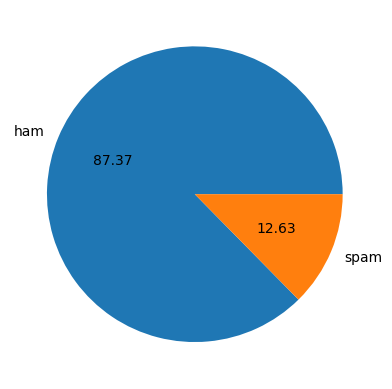

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts() , autopct='%0.2f' , labels = ['ham','spam'])
plt.show() ##extremely imbalanced data

In [35]:
import nltk

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
df['num_characters'] = df['Text'].apply(len)

In [38]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
import spacy

In [41]:
import spacy
nlp = spacy.load("en_core_web_sm")

def tokenize_spacy(text):
    return [token.text for token in nlp(text)]

df['num_words'] = df['Text'].apply(lambda x: len(tokenize_spacy(str(x))))

In [42]:
df

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,39
5568,0,Will Ì_ b going to esplanade fr home?,37,10
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [43]:
import spacy
nlp = spacy.load("en_core_web_sm")

def sent_tokenize_spacy(text):
    doc = nlp(text)
    return [sent.text.strip() for sent in doc.sents]

df['num_sentences'] = df['Text'].apply(lambda x: len(sent_tokenize_spacy(str(x))))
df

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,39,4
5568,0,Will Ì_ b going to esplanade fr home?,37,10,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,3


In [44]:
##ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.961913
std,56.358207,13.224373,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,27.000000


In [45]:
##spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.062787
std,30.137753,7.361204,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

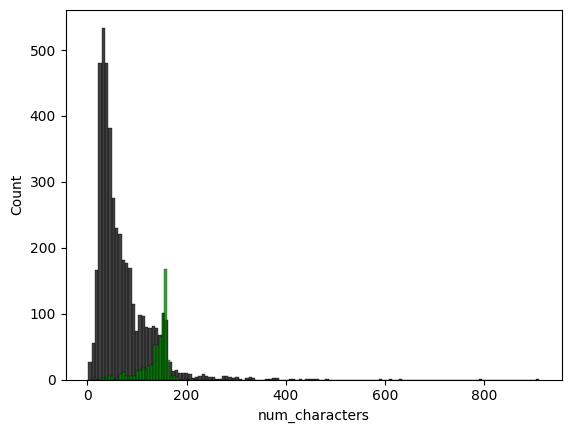

In [47]:
sns.histplot(df[df['Target']==0]['num_characters'], color='k')
sns.histplot(df[df['Target']==1]['num_characters'] , color='g')

<Axes: xlabel='num_words', ylabel='Count'>

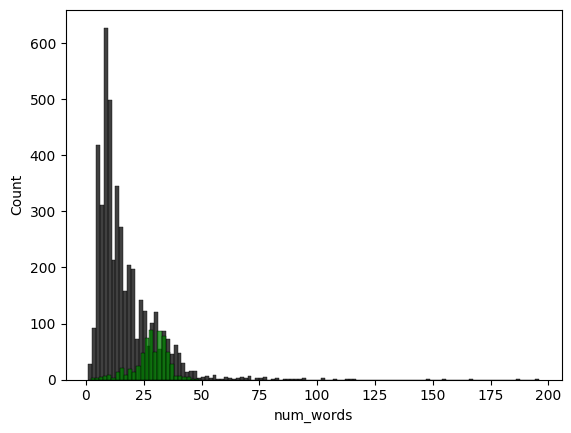

In [48]:
sns.histplot(df[df['Target']==0]['num_words'], color='k')
sns.histplot(df[df['Target']==1]['num_words'] , color='g')

<Axes: >

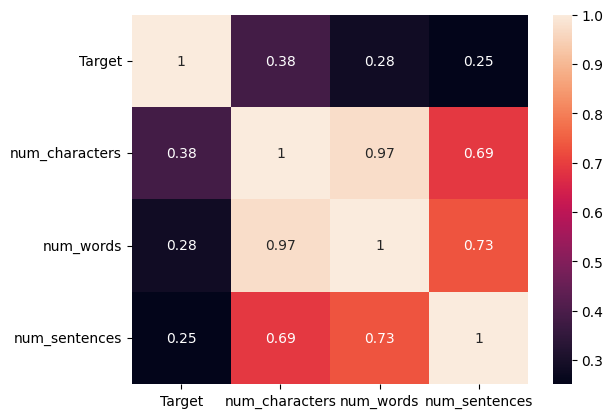

In [49]:
sns.heatmap(df.select_dtypes(include='number').corr() , annot=True)

cant keep all 3 columns**(num_characters , num_words , num_sentences)** because of high correlation between all of them

keeping only num_characters because it has highest correlation with the target

In [50]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem.porter import PorterStemmer
import string

nlp = spacy.load("en_core_web_sm")
ps = PorterStemmer()

def transform_text(text, stem=True):
    doc = nlp(text.lower())  # Lowercase and tokenize
    tokens = []

    for token in doc:
        if token.is_alpha and token.text not in STOP_WORDS and token.text not in string.punctuation:
            word = ps.stem(token.text) if stem else token.text
            tokens.append(word)

    return " ".join(tokens)


In [51]:
transform_text('i Loved the Machine Learning Project which you made on colab!')

'love machin learn project colab'

In [52]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [53]:
df

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entri wkli comp win fa cup final tkt text...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun earli hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,39,4,time tri contact u won pound prize claim easi ...
5568,0,Will Ì_ b going to esplanade fr home?,37,10,1,ì b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,3,guy bitch act like interest buy week gave free


In [54]:
##word cloud
from wordcloud import WordCloud

In [60]:
wc = WordCloud(width=5000 , height=5000 , min_font_size=10 , background_color='Black')

In [61]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

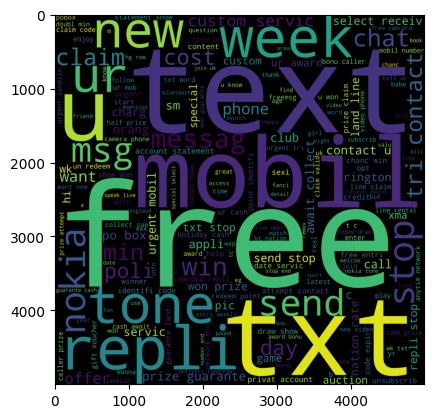

In [62]:
plt.imshow(spam_wc)

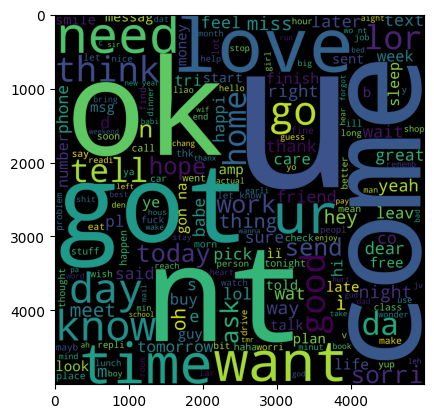

In [63]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [64]:
df

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entri wkli comp win fa cup final tkt text...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun earli hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,39,4,time tri contact u won pound prize claim easi ...
5568,0,Will Ì_ b going to esplanade fr home?,37,10,1,ì b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,3,guy bitch act like interest buy week gave free


In [68]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [69]:
len(spam_corpus)

7582

In [71]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('free', 194),
 ('txt', 139),
 ('text', 126),
 ('ur', 119),
 ('mobil', 118),
 ('u', 113),
 ('stop', 104),
 ('repli', 100),
 ('claim', 98),
 ('prize', 82),
 ('min', 70),
 ('tone', 68),
 ('cash', 65),
 ('servic', 65),
 ('new', 64),
 ('send', 60),
 ('won', 59),
 ('nokia', 58),
 ('urgent', 57),
 ('contact', 56),
 ('week', 55),
 ('award', 55),
 ('phone', 52),
 ('msg', 49),
 ('win', 48),
 ('collect', 45),
 ('messag', 43),
 ('custom', 42),
 ('guarante', 42),
 ('chat', 38)]

In [116]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)  ##going with tfidf

In [117]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [118]:
X.shape

(5169, 3000)

In [119]:
y = df['Target'].values

In [120]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [123]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [124]:
GNB.fit(X_train , y_train)
y_pred1 = GNB.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8268858800773694
[[740 149]
 [ 30 115]]
0.4356060606060606


In [125]:
MNB.fit(X_train , y_train)
y_pred2 = MNB.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[889   0]
 [ 30 115]]
1.0


In [126]:
BNB.fit(X_train , y_train)
y_pred3 = BNB.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[882   7]
 [ 24 121]]
0.9453125


In [127]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred3))

0.8344827586206897


In [128]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred2))

0.7931034482758621


In [129]:
import pickle

In [130]:
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(MNB , open('model.pkl' , 'wb'))